In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import explode, min, max, col, round, hour, minute, count, dayofmonth, month, substring, avg
from pyspark.sql.types import IntegerType
from pyspark.sql.types import TimestampType
import pandas as pd
import numpy as np
import seaborn as sns

warehouse_location = 'hdfs://namenode:8020/warehouse'
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Hive integration example") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .config("hive.metastore.uris", "thrift://hive-metastore:9083") \
    .enableHiveSupport() \
    .getOrCreate()

21/12/09 15:25:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
df_falhas = spark.read.json('hdfs://namenode:8020//raw/fails/1692abe5-8bd0-4a3e-acad-af18231c4114', multiLine = True)

df_sensores = spark.read.json('hdfs://namenode:8020//raw/sensors/8eebb26d-b551-4088-8ba0-9a63adc343de', multiLine = True)

In [3]:
df_sensores = df_sensores.withColumn("results", explode("results")) \
                    .withColumn("sensor_created_at", col("results")["sensor_created_at"].cast("timestamp")) \
                    .withColumn("sensor_event_type", col("results")["sensor_event_type"].cast("string")) \
                    .withColumn("sensor_id_cycle", col("results")["sensor_id_cycle"].cast("integer")) \
                    .withColumn("sensor_ip", col("results")["sensor_ip"].cast("string")) \
                    .withColumn("sensor_unique_id", col("results")["sensor_unique_id"].cast("string")) \
                    .withColumn("sensor_value_humidity", col("results")["sensor_value_humidity"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor1", col("results")["sensor_value_temperature_motor1"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor2", col("results")["sensor_value_temperature_motor2"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor3", col("results")["sensor_value_temperature_motor3"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_x", col("results")["sensor_value_vibrationhz_x"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_y", col("results")["sensor_value_vibrationhz_y"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_z", col("results")["sensor_value_vibrationhz_z"].cast("integer")) \
                    .withColumn("value_noise_dba_motor1", col("results")["value_noise_dba_motor1"].cast("integer")) \
                    .withColumn("value_noise_dba_motor2", col("results")["value_noise_dba_motor2"].cast("integer")) \
                    .withColumn("value_noise_dba_motor3", col("results")["value_noise_dba_motor3"].cast("integer")) \
                    .drop("results") \
                    .orderBy("sensor_created_at")
df_sensores2 = df_sensores.toPandas()

In [36]:
import pandas as pd

In [69]:
df = pd.read_csv('./df_merged49.csv', sep=";")

In [70]:
df

,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,falha_tipo_falha
0,sensor,4,172.18.0.2,e269fcc6-7737-410a-9bad-938f4d926247,23,19,28,8,11,14,20,23,47,23,0
1,sensor,1,172.18.0.2,e461209a-82fe-4ce9-9fb2-d7cebd3b2fa5,22,26,21,27,19,16,20,39,58,46,0
2,sensor,1,172.18.0.2,bf19c9e6-638a-47b0-a499-33878176943b,81,7,30,29,10,16,15,34,63,39,0
3,sensor,4,172.18.0.2,26e31171-15f2-4005-b654-54a2e12dc4dc,41,18,23,11,18,11,21,26,20,44,0
4,sensor,4,172.18.0.2,027c718e-a87e-453a-b0fb-e884f280db4a,42,11,32,17,12,15,14,36,28,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72235,sensor,2,172.18.0.2,f087c835-37bc-4343-b647-118ab4849d0a,54,22,9,29,11,10,16,56,25,54,0
72236,sensor,4,172.18.0.2,dc932a86-5e2b-49d3-a6bf-cd05b294216f,25,19,7,18,13,16,21,17,63,16,0
72237,sensor,2,172.18.0.2,65f78734-bea7-465b-9523-99afab9dabd2,57,8,12,34,21,13,13,39,32,35,0
72238,sensor,4,172.18.0.2,aadb443e-69fb-446e-8b4f-b3930f8bd762,46,6,31,18,19,19,12,59,51,64,0


In [4]:
df_sensores2

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3
0,2021-11-25 12:25:35.015,sensor,4,172.18.0.2,e269fcc6-7737-410a-9bad-938f4d926247,23,19,28,8,11,14,20,23,47,23
1,2021-11-25 12:25:40.016,sensor,1,172.18.0.2,e461209a-82fe-4ce9-9fb2-d7cebd3b2fa5,22,26,21,27,19,16,20,39,58,46
2,2021-11-25 12:25:45.017,sensor,1,172.18.0.2,bf19c9e6-638a-47b0-a499-33878176943b,81,7,30,29,10,16,15,34,63,39
3,2021-11-25 12:25:50.019,sensor,4,172.18.0.2,26e31171-15f2-4005-b654-54a2e12dc4dc,41,18,23,11,18,11,21,26,20,44
4,2021-11-25 12:25:55.020,sensor,4,172.18.0.2,027c718e-a87e-453a-b0fb-e884f280db4a,42,11,32,17,12,15,14,36,28,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72235,2021-11-29 16:47:01.342,sensor,2,172.18.0.2,f087c835-37bc-4343-b647-118ab4849d0a,54,22,9,29,11,10,16,56,25,54
72236,2021-11-29 16:47:06.344,sensor,4,172.18.0.2,dc932a86-5e2b-49d3-a6bf-cd05b294216f,25,19,7,18,13,16,21,17,63,16
72237,2021-11-29 16:47:11.344,sensor,2,172.18.0.2,65f78734-bea7-465b-9523-99afab9dabd2,57,8,12,34,21,13,13,39,32,35
72238,2021-11-29 16:47:16.345,sensor,4,172.18.0.2,aadb443e-69fb-446e-8b4f-b3930f8bd762,46,6,31,18,19,19,12,59,51,64


In [5]:
df_falhas = df_falhas.withColumn("results", explode("results")) \
                .withColumn("falha_created_at", col("results")["falha_created_at"].cast("timestamp")) \
                .withColumn("falha_id_falha", col("results")["falha_id_falha"].cast("string")) \
                .withColumn("falha_ip", col("results")["falha_ip"].cast("string")) \
                .withColumn("falha_hostname", col("results")["falha_hostname"].cast("string")) \
                .withColumn("falha_event_type", col("results")["falha_event_type"].cast("string")) \
                .withColumn("falha_tipo_falha", col("results")["falha_tipo_falha"].cast("string")) \
                .withColumn("falha_error_code", col("results")["falha_error_code"].cast("string")) \
                .withColumn("falha_error_description", col("results")["falha_error_description"].cast("string")) \
                .drop("results") \
                .orderBy("falha_created_at")
df_falhas2 = df_falhas.toPandas()

In [6]:
df_falhas2

,falha_created_at,falha_id_falha,falha_ip,falha_hostname,falha_event_type,falha_tipo_falha,falha_error_code,falha_error_description
0,2021-11-25 16:44:19.978,0c57eba9-1fb8-461a-af31-d0b33c77ee99,172.18.0.2,32e102a5111a,fail,falha_1,erro_500,Pequena falha
1,2021-11-25 16:44:25.021,65bd9df3-2310-4299-bba5-9185da1075a6,172.18.0.2,32e102a5111a,fail,falha_2,erro_500,Falha Geral
2,2021-11-25 16:44:34.911,1c691588-3c43-4e28-84fc-f2edaf98e85f,172.18.0.2,32e102a5111a,fail,falha_3,erro_500,Falha Crítica
3,2021-11-25 17:44:19.980,422e18aa-1b4a-4186-aabb-a022ac854caf,172.18.0.2,32e102a5111a,fail,falha_1,erro_500,Pequena falha
4,2021-11-25 18:44:19.980,8bf65258-ec7a-4b65-b552-a9cc396e17c3,172.18.0.2,32e102a5111a,fail,falha_1,erro_500,Pequena falha
...,...,...,...,...,...,...,...,...
157,2021-11-29 14:44:20.062,7a80527e-2893-4058-bcd3-a4de3fa64b98,172.18.0.2,32e102a5111a,fail,falha_1,erro_500,Pequena falha
158,2021-11-29 15:11:14.926,f685ab8a-9248-4d9c-8d39-3ceb78076448,172.18.0.2,32e102a5111a,fail,falha_3,erro_500,Falha Crítica
159,2021-11-29 15:44:20.063,e7fc28d7-9fd2-42d7-98b9-217bcfb63026,172.18.0.2,32e102a5111a,fail,falha_1,erro_500,Pequena falha
160,2021-11-29 16:34:25.062,d86c0489-e17e-47ba-beda-084e57df1c40,172.18.0.2,32e102a5111a,fail,falha_2,erro_500,Falha Geral


In [7]:
df_falhas2 = df_falhas2[["falha_created_at", "falha_tipo_falha", "falha_error_description"]]
df_falhas2.rename(columns = {'falha_created_at':'sensor_created_at'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
dfsensoresmin = df_sensores.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_month", month("sensor_created_at")) \
             .withColumn("sensor_hour", substring("sensor_created_at", 11, 13)) \
             .withColumn("sensor_date", substring("sensor_created_at", 0, 10)) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 16).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [9]:
dfsensoresmin.toPandas()

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,sensor_dayOfMonth,sensor_month,sensor_hour,sensor_date,sensor_datehhmm
0,2021-11-25 12:25:40.016,sensor,1,172.18.0.2,e461209a-82fe-4ce9-9fb2-d7cebd3b2fa5,22,26,21,27,19,16,20,39,58,46,25,11,12:25:40.016,2021-11-25,2021-11-25 12:25:00
1,2021-11-25 12:25:35.015,sensor,4,172.18.0.2,e269fcc6-7737-410a-9bad-938f4d926247,23,19,28,8,11,14,20,23,47,23,25,11,12:25:35.015,2021-11-25,2021-11-25 12:25:00
2,2021-11-25 12:25:50.019,sensor,4,172.18.0.2,26e31171-15f2-4005-b654-54a2e12dc4dc,41,18,23,11,18,11,21,26,20,44,25,11,12:25:50.019,2021-11-25,2021-11-25 12:25:00
3,2021-11-25 12:25:55.020,sensor,4,172.18.0.2,027c718e-a87e-453a-b0fb-e884f280db4a,42,11,32,17,12,15,14,36,28,40,25,11,12:25:55.02,2021-11-25,2021-11-25 12:25:00
4,2021-11-25 12:25:45.017,sensor,1,172.18.0.2,bf19c9e6-638a-47b0-a499-33878176943b,81,7,30,29,10,16,15,34,63,39,25,11,12:25:45.017,2021-11-25,2021-11-25 12:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72235,2021-11-29 16:47:21.346,sensor,1,172.18.0.2,cb00939a-3bfa-4b00-8be4-1bd80f0611cc,42,23,22,21,10,20,17,28,42,20,29,11,16:47:21.346,2021-11-29,2021-11-29 16:47:00
72236,2021-11-29 16:47:01.342,sensor,2,172.18.0.2,f087c835-37bc-4343-b647-118ab4849d0a,54,22,9,29,11,10,16,56,25,54,29,11,16:47:01.342,2021-11-29,2021-11-29 16:47:00
72237,2021-11-29 16:47:11.344,sensor,2,172.18.0.2,65f78734-bea7-465b-9523-99afab9dabd2,57,8,12,34,21,13,13,39,32,35,29,11,16:47:11.344,2021-11-29,2021-11-29 16:47:00
72238,2021-11-29 16:47:06.344,sensor,4,172.18.0.2,dc932a86-5e2b-49d3-a6bf-cd05b294216f,25,19,7,18,13,16,21,17,63,16,29,11,16:47:06.344,2021-11-29,2021-11-29 16:47:00


In [ ]:
colName = "sensor_value_humidity"

dfsensoresminagg = dfsensoresmin.groupBy("sensor_datehhmm", "sensor_ip") \
     .agg( \
     min("sensor_value_humidity").alias('min_humidity'), \
     max("sensor_value_humidity").alias('max_humidity'), \
     round(avg("sensor_value_humidity"), 2).alias('avg_humidity'), \
     min("sensor_value_temperature_motor1").alias('min_temp_motor1'), \
     max("sensor_value_temperature_motor1").alias('max_temp_motor1'), \
     round(avg("sensor_value_temperature_motor1"), 2).alias('avg_temp_motor1'), \
     min("sensor_value_temperature_motor2").alias('min_temp_motor2'), \
     max("sensor_value_temperature_motor2").alias('max_temp_motor2'), \
     round(avg("sensor_value_temperature_motor2"), 2).alias('avg_temp_motor2'), \
     min("sensor_value_temperature_motor3").alias('min_temp_motor3'), \
     max("sensor_value_temperature_motor3").alias('max_temp_motor3'), \
     round(avg("sensor_value_temperature_motor3"), 2).alias('avg_temp_motor3'), \
     min("sensor_value_vibrationhz_x").alias('min_vibrationhz_x'), \
     max("sensor_value_vibrationhz_x").alias('max_vibrationhz_x'), \
     round(avg("sensor_value_vibrationhz_x"), 2).alias('avg_vibrationhz_x'), \
     min("sensor_value_vibrationhz_y").alias('min_vibrationhz_y'), \
     max("sensor_value_vibrationhz_y").alias('max_vibrationhz_y'), \
     round(avg("sensor_value_vibrationhz_y"), 2).alias('avg_vibrationhz_y'), \
     min("sensor_value_vibrationhz_z").alias('min_vibrationhz_z'), \
     max("sensor_value_vibrationhz_z").alias('max_vibrationhz_z'), \
     round(avg("sensor_value_vibrationhz_z"), 2).alias('avg_vibrationhz_z'), \
     min("value_noise_dba_motor1").alias('min_noise_dba_motor1'), \
     max("value_noise_dba_motor1").alias('max_noise_dba_motor1'), \
     round(avg("value_noise_dba_motor1"), 2).alias('avg_noise_dba_motor1'), \
     min("value_noise_dba_motor2").alias('min_noise_dba_motor2'), \
     max("value_noise_dba_motor2").alias('max_noise_dba_motor2'), \
     round(avg("value_noise_dba_motor2"), 2).alias('avg_noise_dba_motor2'), \
     min("value_noise_dba_motor3").alias('min_noise_dba_motor3'), \
     max("value_noise_dba_motor3").alias('max_noise_dba_motor3'), \
     round(avg("value_noise_dba_motor3"), 2).alias('avg_noise_dba_motor3'), \
     count(colName).alias("temp_count_hour")) \
     .withColumn('temp_count_hour', col('temp_count_hour').cast('int'))  \
     .orderBy("sensor_datehhmm")    

In [ ]:
dfsensoresminagg.toPandas()

In [ ]:
dfsensoress = dfsensoresminagg.toPandas()

In [ ]:
df_falhas

In [ ]:
df_falhas22=spark.createDataFrame(df_falhas2) 

In [ ]:
dffalhasmin = df_falhas22.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 16).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [ ]:
dffalhasmin

In [ ]:
dffalhass = dffalhasmin.toPandas()

In [ ]:
import pandas as pd
df_merged = pd.merge_asof(dfsensoress, dffalhass, on="sensor_datehhmm", tolerance=pd.Timedelta("50s"))

In [ ]:
df_merged

In [ ]:
df_merged = df_merged.copy()
df_merged = df_merged.fillna('sem_falha')

In [ ]:
df_merged["falha_error_description"].value_counts()

In [ ]:
df_merged.to_csv('./df_merged2.csv', index=False)

In [ ]:
df_merged = df_merged.copy()
df_merged = df_merged.fillna('sem_falha')

In [ ]:
df_merged["falha_tipo_falha"].value_counts()

In [ ]:
df_merged

In [ ]:
df_merged = df_merged.drop(columns=['falha_error_description', 'sensor_dayOfMonth', 'sensor_created_at'])

In [ ]:
df_merged["falha_tipo_falha"].replace({"sem_falha": "0", "falha_1": "1","falha_2": "1", "falha_3": "1"}, inplace=True)

In [ ]:
df_merged

In [17]:
pip install h2o==3.32.1.7

Note: you may need to restart the kernel to use updated packages.


In [18]:
import h2o

In [19]:
h2o.init(ip="172.16.131.140", port="54321")

Checking whether there is an H2O instance running at http://172.16.131.140:54321 . connected.


H2O_cluster_uptime:,26 mins 34 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.7
H2O_cluster_version_age:,3 months and 6 days
H2O_cluster_name:,H2O_CLUSTER
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,31.69 Gb
H2O_cluster_total_cores:,32
H2O_cluster_allowed_cores:,32
H2O_cluster_status:,"locked, healthy"


In [20]:
pip install cane

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard
import mlflow
import mlflow.h2o
from mlflow.tracking import MlflowClient
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE

In [61]:
h2o.remove_all()

In [71]:
target = 'falha_tipo_falha'
#train, test = train_test_split(dfconceito, test_size=0.2, random_state=25)
train = df[0:65000]
test = df[55000:72239]
#col_obj=object(df_mergedminagg2)

#col_not_obj = not_object(df_mergedminagg2)
#col_not_obj.remove('falha_tipo_falha')

In [25]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [50]:
import boto3
import os

In [51]:
os.environ["MLFLOW_TRACKING_URI"] = "http://mlflow:5000"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://minio:9000"
os.environ["AWS_ACCESS_KEY_ID"] = "minio"
os.environ["AWS_SECRET_ACCESS_KEY"] = "minio123"

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as AUC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,falha_tipo_falha
sensor,4,172.18.0.2,E269FCC6-7737-410A-9BAD-938F4D926247,23,19,28,8,11,14,20,23,47,23,0
sensor,1,172.18.0.2,E461209A-82FE-4CE9-9FB2-D7CEBD3B2FA5,22,26,21,27,19,16,20,39,58,46,0
sensor,1,172.18.0.2,BF19C9E6-638A-47B0-A499-33878176943B,81,7,30,29,10,16,15,34,63,39,0
sensor,4,172.18.0.2,26E31171-15F2-4005-B654-54A2E12DC4DC,41,18,23,11,18,11,21,26,20,44,0
sensor,4,172.18.0.2,027C718E-A87E-453A-B0FB-E884F280DB4A,42,11,32,17,12,15,14,36,28,40,0
sensor,2,172.18.0.2,D40DE4A1-70B0-4CDF-95E3-A8604769F83C,35,18,10,23,12,17,15,21,54,36,0
sensor,3,172.18.0.2,B6099A82-79BB-4F63-984D-90EE76E14479,69,14,16,7,12,12,15,47,63,38,0
sensor,1,172.18.0.2,F4EB58AC-AA15-40D5-8D9E-DFFCEDF69C4A,39,16,6,32,12,15,13,21,27,37,0
sensor,1,172.18.0.2,F66C1AA6-DB82-490F-8C4A-A90950985815,18,23,12,31,18,14,14,49,49,18,0
sensor,4,172.18.0.2,1509BE32-6314-4388-9B81-E8E101647062,18,16,7,6,21,17,17,34,33,48,0



['sensor_event_type', 'sensor_id_cycle', 'sensor_ip', 'sensor_unique_id', 'sensor_value_humidity', 'sensor_value_temperature_motor1', 'sensor_value_temperature_motor2', 'sensor_value_temperature_motor3', 'sensor_value_vibrationhz_x', 'sensor_value_vibrationhz_y', 'sensor_value_vibrationhz_z', 'value_noise_dba_motor1', 'value_noise_dba_motor2', 'value_noise_dba_motor3']
falha_tipo_falha
AutoML progress: |
12:31:17.763: New models will be added to existing leaderboard provaconceito173@@falha_tipo_falha (leaderboard frame=null) with already 130 models.

████████████████████████████████████████████████████
12:59:55.572: StackedEnsemble_BestOfFamily_AutoML_20211210_123117 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Base models are inconsistent: they use different size (number of rows) training frames. Found: 55000 (StackedEnsemble) and 60000 (model DeepLearning_grid__3_AutoML_20211210_115936_model_3).
12:59:5

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid__1_AutoML_20211210_115936_model_26,0.579228,0.0214372,0.00281762,0.494552,0.0520268,0.00270679,1269,0.019451,GBM
GBM_grid__1_AutoML_20211210_115936_model_39,0.570885,0.0668882,0.00305979,0.489406,0.0676736,0.00457971,3427,0.044683,GBM
GBM_grid__1_AutoML_20211210_115936_model_23,0.570474,0.0249325,0.00272831,0.492864,0.0495859,0.00245876,3017,0.030694,GBM
GBM_grid__1_AutoML_20211210_123117_model_19,0.568497,0.0199657,0.00279172,0.496478,0.04748,0.00225435,1042,0.018042,GBM
GBM_4_AutoML_20211210_123117,0.560807,0.0224153,0.00256677,0.480734,0.0510342,0.00260449,1361,0.020094,GBM
XGBoost_grid__1_AutoML_20211210_123117_model_12,0.559305,0.0169326,0.00265737,0.47364,0.0470367,0.00221246,11483,0.004854,XGBoost
GBM_grid__1_AutoML_20211210_115936_model_44,0.559108,0.0311842,0.0027791,0.496783,0.0537096,0.00288472,3120,0.038457,GBM
GBM_grid__1_AutoML_20211210_123117_model_41,0.556961,0.0414236,0.002814,0.482254,0.066461,0.00441707,1548,0.020918,GBM
XGBoost_grid__1_AutoML_20211210_123117_model_11,0.555341,0.0162675,0.00245267,0.433984,0.0469186,0.00220135,6805,0.003382,XGBoost
XGBoost_grid__1_AutoML_20211210_123117_model_30,0.550192,0.0169051,0.00260586,0.492933,0.0470702,0.0022156,5953,0.003196,XGBoost


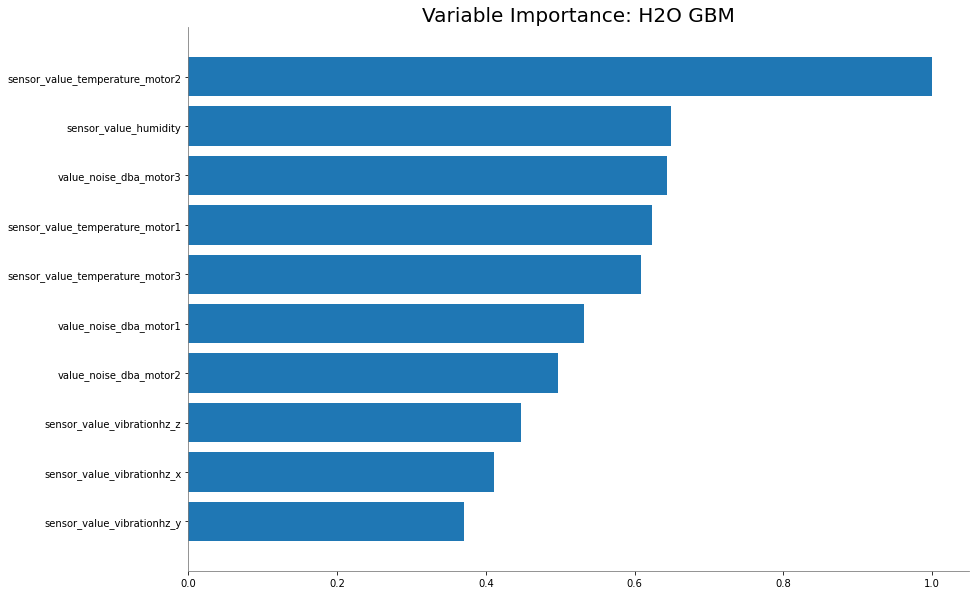

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999947,5.28646e-05
0,0.999904,9.62364e-05
0,0.999935,6.4775e-05
0,0.999963,3.72429e-05
0,0.999913,8.7404e-05
0,0.999892,0.000107753
0,0.999905,9.50214e-05
0,0.999852,0.000147803
0,0.999215,0.000785454
0,0.999806,0.00019423




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0019086976890250707
RMSE: 0.043688644852239014
LogLoss: 0.01615086379424041
Mean Per-Class Error: 0.35371668288144675
AUC: 0.6431788721887683
AUCPR: 0.21764724199014898
Gini: 0.2863577443775367

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3895390685579345: 


,,0,1,Error,Rate
0,0,17196.0,2.0,0.0001,(2.0/17198.0)
1,1,29.0,12.0,0.7073,(29.0/41.0)
2,Total,17225.0,14.0,0.0018,(31.0/17239.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.389539,0.436364,13.0
1,max f2,0.389539,0.337079,13.0
2,max f0point5,0.389539,0.618557,13.0
3,max accuracy,0.389539,0.998202,13.0
4,max precision,0.389539,0.857143,13.0
5,max recall,0.000040,1.000000,395.0
6,max specificity,0.931975,0.999942,0.0
7,max absolute_mcc,0.389539,0.500279,13.0
8,max min_per_class_accuracy,0.000212,0.609756,359.0
9,max mean_per_class_accuracy,0.389539,0.646283,13.0



Gains/Lift Table: Avg response rate:  0.24 %, avg score:  0.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010035,0.013673,29.165092,29.165092,0.069364,0.100194,0.069364,0.100194,0.292683,0.292683,2816.509234,2816.509234,0.283321
1,2,0.020013,0.004622,0.000000,14.624814,0.000000,0.007761,0.034783,0.054112,0.000000,0.292683,-100.000000,1362.481442,0.273320
2,3,0.030048,0.002511,0.000000,9.740465,0.000000,0.003322,0.023166,0.037149,0.000000,0.292683,-100.000000,874.046520,0.263261
3,4,0.040026,0.001701,0.000000,7.312407,0.000000,0.002052,0.017391,0.028400,0.000000,0.292683,-100.000000,631.240721,0.253260
4,5,0.050003,0.001330,0.000000,5.853319,0.000000,0.001486,0.013921,0.023030,0.000000,0.292683,-100.000000,485.331900,0.243259
5,6,0.100006,0.000648,0.000000,2.926659,0.000000,0.000891,0.006961,0.011960,0.000000,0.292683,-100.000000,192.665950,0.193136
6,7,0.150009,0.000452,0.975553,2.276291,0.002320,0.000537,0.005414,0.008152,0.048780,0.341463,-2.444683,127.629072,0.191911
7,8,0.200012,0.000350,0.975553,1.951106,0.002320,0.000395,0.004640,0.006213,0.048780,0.390244,-2.444683,95.110633,0.190686
8,9,0.300017,0.000245,0.487777,1.463330,0.001160,0.000291,0.003480,0.004239,0.048780,0.439024,-51.222342,46.332975,0.139338
9,10,0.400023,0.000188,1.707218,1.524302,0.004060,0.000214,0.003625,0.003233,0.170732,0.609756,70.721804,52.430182,0.210233




55000    0
55001    0
55002    0
55003    0
55004    0
        ..
72234    0
72235    0
72236    0
72237    0
72238    0
Name: falha_tipo_falha, Length: 17239, dtype: object


In [65]:
train_h2o=h2o.H2OFrame(train)
test_h2o=h2o.H2OFrame(test)

print (train_h2o)

x = train_h2o.columns
y = target
x.remove(y)

print (x)
print (y)

train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

experiment_name = 'provaconceito183'

client = MlflowClient()

try:
    experiment = mlflow.create_experiment(experiment_name)
except:
    experiment = client.get_experiment_by_name(experiment_name)
mlflow.set_experiment(experiment_name)


with mlflow.start_run():
    model = H2OAutoML(max_runtime_secs = 2000, seed = 1, project_name = "provaconceito173", nfolds=10, sort_metric = 'AUC')
    model.train(x=x, y=y, training_frame = train_h2o)
   
    mlflow.log_param("runtime_sec", model.max_runtime_secs)
    mlflow.log_param("seed", model.seed)
    mlflow.log_param("nfolds", model.nfolds)
    mlflow.h2o.log_model(model.leader, "model")
    
    lb = model.leaderboard
    lb = get_leaderboard(model, extra_columns='ALL')
    print('')
    print(lb.head(rows=lb.nrows))
    model.leader.varimp_plot()
    pred = model.predict(test_h2o)
    print(pred.head())
    pred_df = h2o.as_list(pred)

    perf = model.leader.model_performance(test_h2o)
    print(perf)
    print(test[y])
 #   auc = AUC(test[y], pred)
 #   precision, recall, thresholds = precision_recall_curve(test, pred_df)
  #  auc_precision_recall = auc(recall, precision)
  #  print(auc_precision_recall)
   # nmae = NMAE(mae, test[y])
  #  print('--------AUC-------', auc)
   # print('--------NMAE-------', nmae)
   # mlflow.log_metric("auc", auc)
    #print('--------AUC-------', AUC)
   # mlflow.log_metric("nmae", nmae)
    #exm = model.leader.explain_row(test_h2o, row_index=200)

#all_mlflow_runs = client.list_run_infos(experiment.experiment_id)
#if len(all_mlflow_runs) > 0:
#    run_info = all_mlflow_runs[-1]
#    model = mlflow.h2o.load_model("mlruns/{exp_id}/{run_id}/artifacts/model/".format(exp_id=experiment.experiment_id,run_id=run_info.run_uuid))
#    result = model.predict(test_h2o)
#else:
#    raise Exception('Run the training first')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,falha_tipo_falha
sensor,4,172.18.0.2,E269FCC6-7737-410A-9BAD-938F4D926247,23,19,28,8,11,14,20,23,47,23,0
sensor,1,172.18.0.2,E461209A-82FE-4CE9-9FB2-D7CEBD3B2FA5,22,26,21,27,19,16,20,39,58,46,0
sensor,1,172.18.0.2,BF19C9E6-638A-47B0-A499-33878176943B,81,7,30,29,10,16,15,34,63,39,0
sensor,4,172.18.0.2,26E31171-15F2-4005-B654-54A2E12DC4DC,41,18,23,11,18,11,21,26,20,44,0
sensor,4,172.18.0.2,027C718E-A87E-453A-B0FB-E884F280DB4A,42,11,32,17,12,15,14,36,28,40,0
sensor,2,172.18.0.2,D40DE4A1-70B0-4CDF-95E3-A8604769F83C,35,18,10,23,12,17,15,21,54,36,0
sensor,3,172.18.0.2,B6099A82-79BB-4F63-984D-90EE76E14479,69,14,16,7,12,12,15,47,63,38,0
sensor,1,172.18.0.2,F4EB58AC-AA15-40D5-8D9E-DFFCEDF69C4A,39,16,6,32,12,15,13,21,27,37,0
sensor,1,172.18.0.2,F66C1AA6-DB82-490F-8C4A-A90950985815,18,23,12,31,18,14,14,49,49,18,0
sensor,4,172.18.0.2,1509BE32-6314-4388-9B81-E8E101647062,18,16,7,6,21,17,17,34,33,48,0



['sensor_event_type', 'sensor_id_cycle', 'sensor_ip', 'sensor_unique_id', 'sensor_value_humidity', 'sensor_value_temperature_motor1', 'sensor_value_temperature_motor2', 'sensor_value_temperature_motor3', 'sensor_value_vibrationhz_x', 'sensor_value_vibrationhz_y', 'sensor_value_vibrationhz_z', 'value_noise_dba_motor1', 'value_noise_dba_motor2', 'value_noise_dba_motor3']
falha_tipo_falha
AutoML progress: |
16:13:29.685: New models will be added to existing leaderboard provaconceito193@@falha_tipo_falha (leaderboard frame=null) with already 114 models.

████████████████████████████████████████████████████████| 100%

16:18:30.853: StackedEnsemble_AllModels_AutoML_20211211_161329 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Base models are inconsistent: they use different size (number of rows) training frames. Found: 65000 (StackedEnsemble) and 55000 (model GBM_grid__1_AutoML_20211210_162956_model_16).




model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_20211211_161329,1,0.000267038,1,0,0.00825102,6.80793e-05,3470,0.006255,GLM
XGBoost_grid__1_AutoML_20211211_161329_model_7,1,0.43754,1,0,0.354378,0.125584,140,0.000711,XGBoost
DRF_1_AutoML_20211211_161329,1,0.000206936,1,0,0.00540647,2.92299e-05,442,0.008187,DRF
GBM_1_AutoML_20211211_161329,1,0.000128136,1,0,0.00392114,1.53754e-05,796,0.015288,GBM
GBM_grid__1_AutoML_20211211_161329_model_3,1,0.000766954,1,0,0.00229592,5.27124e-06,144,0.002564,GBM
GBM_5_AutoML_20211211_161329,1,4.05993e-05,1,0,5.34776e-05,2.85986e-09,1084,0.014995,GBM
XGBoost_grid__1_AutoML_20211211_161329_model_4,1,0.000149446,1,0,0.00584534,3.4168e-05,4068,0.001961,XGBoost
XRT_1_AutoML_20211211_161329,1,0.00802036,1,0,0.0340599,0.00116008,547,0.009726,DRF
XGBoost_grid__1_AutoML_20211211_161329_model_1,1,0.000157344,0.999952,7.70939e-06,0.00600381,3.60457e-05,4458,0.002057,XGBoost
XGBoost_1_AutoML_20211211_161329,1,0.000478663,0.999905,0.00347222,0.00999604,9.99208e-05,2235,0.00138,XGBoost


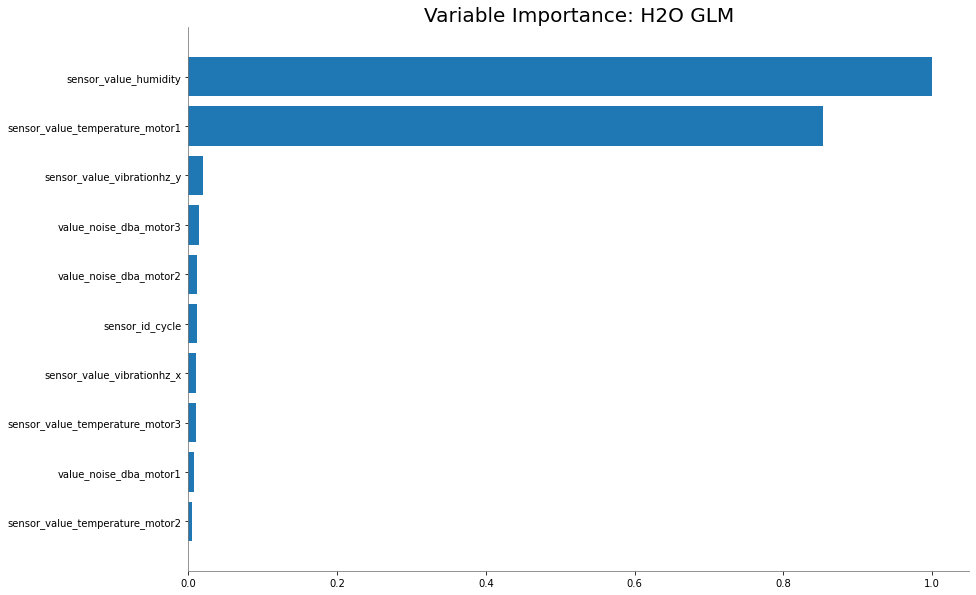

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,1,8.46924e-21
0,1,7.44203e-20
0,1,5.42471e-09
0,1,1.91115e-39
0,1,1.78101e-16
0,1,1.86638e-15
0,1,1.25296e-27
0,1,2.28108e-26
0,1,5.19106e-36
0,1,3.94371e-23




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 3.0049687334185827e-05
RMSE: 0.005481759510794488
LogLoss: 0.00019426450870711252
Null degrees of freedom: 17238
Residual degrees of freedom: 17227
Null deviance: 577.495899105865
Residual deviance: 6.697851731203487
AIC: 30.697851731203485
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4999675326054879: 


,,0,1,Error,Rate
0,0,17198.0,0.0,0.0,(0.0/17198.0)
1,1,0.0,41.0,0.0,(0.0/41.0)
2,Total,17198.0,41.0,0.0,(0.0/17239.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.999675e-01,1.000000,34.0
1,max f2,4.999675e-01,1.000000,34.0
2,max f0point5,4.999675e-01,1.000000,34.0
3,max accuracy,4.999675e-01,1.000000,34.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,4.999675e-01,1.000000,34.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,4.999675e-01,1.000000,34.0
8,max min_per_class_accuracy,4.999675e-01,1.000000,34.0
9,max mean_per_class_accuracy,4.999675e-01,1.000000,34.0



Gains/Lift Table: Avg response rate:  0.24 %, avg score:  0.24 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010035,7.153144e-04,99.647399,99.647399,0.236994,2.373064e-01,0.236994,0.237306,1.0,1.0,9864.739884,9864.739884,0.992325
1,2,0.020013,3.311380e-05,0.000000,49.968116,0.000000,2.167716e-04,0.118841,0.119105,0.0,1.0,-100.000000,4896.811594,0.982324
2,3,0.030048,2.723136e-06,0.000000,33.279923,0.000000,1.223077e-05,0.079151,0.079331,0.0,1.0,-100.000000,3227.992278,0.972264
3,4,0.040026,4.762974e-07,0.000000,24.984058,0.000000,1.320755e-06,0.059420,0.059556,0.0,1.0,-100.000000,2398.405797,0.962263
4,5,0.050003,9.614565e-08,0.000000,19.998840,0.000000,2.179066e-07,0.047564,0.047672,0.0,1.0,-100.000000,1899.883991,0.952262
5,6,0.100006,1.433583e-10,0.000000,9.999420,0.000000,1.300692e-08,0.023782,0.023836,0.0,1.0,-100.000000,899.941995,0.902140
6,7,0.150009,9.314607e-13,0.000000,6.666280,0.000000,2.638234e-11,0.015855,0.015891,0.0,1.0,-100.000000,566.627997,0.852018
7,8,0.200012,1.402268e-14,0.000000,4.999710,0.000000,2.102892e-13,0.011891,0.011918,0.0,1.0,-100.000000,399.970998,0.801896
8,9,0.300017,1.663287e-17,0.000000,3.333140,0.000000,1.934580e-15,0.007927,0.007945,0.0,1.0,-100.000000,233.313998,0.701651
9,10,0.400023,4.222543e-20,0.000000,2.499855,0.000000,2.515806e-18,0.005945,0.005959,0.0,1.0,-100.000000,149.985499,0.601407




55000    0
55001    0
55002    0
55003    0
55004    0
        ..
72234    0
72235    0
72236    0
72237    0
72238    0
Name: falha_tipo_falha, Length: 17239, dtype: int64


In [72]:
train_h2o=h2o.H2OFrame(train)
test_h2o=h2o.H2OFrame(test)

print (train_h2o)

x = train_h2o.columns
y = target
x.remove(y)

print (x)
print (y)

train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

experiment_name = 'provaconceito193'

client = MlflowClient()

try:
    experiment = mlflow.create_experiment(experiment_name)
except:
    experiment = client.get_experiment_by_name(experiment_name)
mlflow.set_experiment(experiment_name)


with mlflow.start_run():
    model = H2OAutoML(max_runtime_secs = 300, seed = 1, project_name = "provaconceito193", nfolds=10, sort_metric = 'AUC')
    model.train(x=x, y=y, training_frame = train_h2o)
   
    mlflow.log_param("runtime_sec", model.max_runtime_secs)
    mlflow.log_param("seed", model.seed)
    mlflow.log_param("nfolds", model.nfolds)
    mlflow.h2o.log_model(model.leader, "model")
    
    lb = model.leaderboard
    lb = get_leaderboard(model, extra_columns='ALL')
    print('')
    print(lb.head(rows=lb.nrows))
    model.leader.varimp_plot()
    pred = model.predict(test_h2o)
    print(pred.head())
    pred_df = h2o.as_list(pred)

    perf = model.leader.model_performance(test_h2o)
    print(perf)
    print(test[y])
 #   auc = AUC(test[y], pred)
 #   precision, recall, thresholds = precision_recall_curve(test, pred_df)
  #  auc_precision_recall = auc(recall, precision)
  #  print(auc_precision_recall)
   # nmae = NMAE(mae, test[y])
  #  print('--------AUC-------', auc)
   # print('--------NMAE-------', nmae)
   # mlflow.log_metric("auc", auc)
    #print('--------AUC-------', AUC)
   # mlflow.log_metric("nmae", nmae)
    #exm = model.leader.explain_row(test_h2o, row_index=200)

#all_mlflow_runs = client.list_run_infos(experiment.experiment_id)
#if len(all_mlflow_runs) > 0:
#    run_info = all_mlflow_runs[-1]
#    model = mlflow.h2o.load_model("mlruns/{exp_id}/{run_id}/artifacts/model/".format(exp_id=experiment.experiment_id,run_id=run_info.run_uuid))
#    result = model.predict(test_h2o)
#else:
#    raise Exception('Run the training first')

In [12]:
df_merged46 = df_merged46.drop(columns=['sensor_created_at', 'falha_error_description'])

In [10]:
df_merged45 = pd.merge_asof(df_sensores2, df_falhas2, on="sensor_created_at", tolerance=pd.Timedelta("5s"))

In [ ]:
df_merged45["falha_tipo_falha"].value_counts()

In [ ]:
df_falhas2["falha_tipo_falha"].value_counts()

In [ ]:
df_falhas2

In [ ]:
df_merged45

In [11]:
df_merged46 = df_merged45.copy()
df_merged46 = df_merged46.fillna('sem_falha')

In [13]:
df_merged46["falha_tipo_falha"].value_counts()

sem_falha    72078
falha_1         97
falha_2         47
falha_3         18
Name: falha_tipo_falha, dtype: int64

In [16]:
df_merged46

,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,falha_tipo_falha
0,sensor,4,172.18.0.2,e269fcc6-7737-410a-9bad-938f4d926247,23,19,28,8,11,14,20,23,47,23,0
1,sensor,1,172.18.0.2,e461209a-82fe-4ce9-9fb2-d7cebd3b2fa5,22,26,21,27,19,16,20,39,58,46,0
2,sensor,1,172.18.0.2,bf19c9e6-638a-47b0-a499-33878176943b,81,7,30,29,10,16,15,34,63,39,0
3,sensor,4,172.18.0.2,26e31171-15f2-4005-b654-54a2e12dc4dc,41,18,23,11,18,11,21,26,20,44,0
4,sensor,4,172.18.0.2,027c718e-a87e-453a-b0fb-e884f280db4a,42,11,32,17,12,15,14,36,28,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72235,sensor,2,172.18.0.2,f087c835-37bc-4343-b647-118ab4849d0a,54,22,9,29,11,10,16,56,25,54,0
72236,sensor,4,172.18.0.2,dc932a86-5e2b-49d3-a6bf-cd05b294216f,25,19,7,18,13,16,21,17,63,16,0
72237,sensor,2,172.18.0.2,65f78734-bea7-465b-9523-99afab9dabd2,57,8,12,34,21,13,13,39,32,35,0
72238,sensor,4,172.18.0.2,aadb443e-69fb-446e-8b4f-b3930f8bd762,46,6,31,18,19,19,12,59,51,64,0


In [31]:
df_merged46.to_csv('./df_merged46.csv', index=False)

In [15]:
df_merged46["falha_tipo_falha"].replace({"sem_falha": "0", "falha_1": "1","falha_2": "1", "falha_3": "1"}, inplace=True)

In [ ]:
df_merged=spark.createDataFrame(df_merged) 
df_merged=spark.createDataFrame(df_merged) 

In [ ]:
dfmergedd = df_merged.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_month", month("sensor_created_at")) \
             .withColumn("sensor_hour", substring("sensor_created_at", 11, 13)) \
             .withColumn("sensor_date", substring("sensor_created_at", 0, 10)) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 16).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [ ]:
colName = "falha_tipo_falha"

dfmergedd2 = dfmergedd.groupBy("sensor_datehhmm", "sensor_ip") \
     .agg( \
     min("sensor_value_humidity").alias('min_humidity'), \
     max("sensor_value_humidity").alias('max_humidity'), \
     round(avg("sensor_value_humidity"), 2).alias('avg_humidity'), \
     min("sensor_value_temperature_motor1").alias('min_temp_motor1'), \
     max("sensor_value_temperature_motor1").alias('max_temp_motor1'), \
     round(avg("sensor_value_temperature_motor1"), 2).alias('avg_temp_motor1'), \
     min("sensor_value_temperature_motor2").alias('min_temp_motor2'), \
     max("sensor_value_temperature_motor2").alias('max_temp_motor2'), \
     round(avg("sensor_value_temperature_motor2"), 2).alias('avg_temp_motor2'), \
     min("sensor_value_temperature_motor3").alias('min_temp_motor3'), \
     max("sensor_value_temperature_motor3").alias('max_temp_motor3'), \
     round(avg("sensor_value_temperature_motor3"), 2).alias('avg_temp_motor3'), \
     min("sensor_value_vibrationhz_x").alias('min_vibrationhz_x'), \
     max("sensor_value_vibrationhz_x").alias('max_vibrationhz_x'), \
     round(avg("sensor_value_vibrationhz_x"), 2).alias('avg_vibrationhz_x'), \
     min("sensor_value_vibrationhz_y").alias('min_vibrationhz_y'), \
     max("sensor_value_vibrationhz_y").alias('max_vibrationhz_y'), \
     round(avg("sensor_value_vibrationhz_y"), 2).alias('avg_vibrationhz_y'), \
     min("sensor_value_vibrationhz_z").alias('min_vibrationhz_z'), \
     max("sensor_value_vibrationhz_z").alias('max_vibrationhz_z'), \
     round(avg("sensor_value_vibrationhz_z"), 2).alias('avg_vibrationhz_z'), \
     min("value_noise_dba_motor1").alias('min_noise_dba_motor1'), \
     max("value_noise_dba_motor1").alias('max_noise_dba_motor1'), \
     round(avg("value_noise_dba_motor1"), 2).alias('avg_noise_dba_motor1'), \
     min("value_noise_dba_motor2").alias('min_noise_dba_motor2'), \
     max("value_noise_dba_motor2").alias('max_noise_dba_motor2'), \
     round(avg("value_noise_dba_motor2"), 2).alias('avg_noise_dba_motor2'), \
     min("value_noise_dba_motor3").alias('min_noise_dba_motor3'), \
     max("value_noise_dba_motor3").alias('max_noise_dba_motor3'), \
     round(avg("value_noise_dba_motor3"), 2).alias('avg_noise_dba_motor3'), \
     count(colName).alias("temp_count_hour")) \
     .withColumn('temp_count_hour', col('temp_count_hour').cast('int'))  \
     .orderBy("sensor_datehhmm")               

In [ ]:
dfmergedd3 = dfmergedd2.toPandas()

In [ ]:
dfmergedd3

In [ ]:
dfsensoresmin = df_sensores.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_month", month("sensor_created_at")) \
             .withColumn("sensor_hour", substring("sensor_created_at", 11, 13)) \
             .withColumn("sensor_date", substring("sensor_created_at", 0, 10)) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 16).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [ ]:
dfsensoresminagg = dfsensoresmin.toPandas()

In [ ]:
dfsensoresminagg

In [ ]:
colName = "sensor_value_humidity"

dfsensoresminagg = dfsensoresmin.groupBy("sensor_datehhmm", "sensor_ip") \
     .agg( \
     min("sensor_value_humidity").alias('min_humidity'), \
     max("sensor_value_humidity").alias('max_humidity'), \
     round(avg("sensor_value_humidity"), 2).alias('avg_humidity'), \
     min("sensor_value_temperature_motor1").alias('min_temp_motor1'), \
     max("sensor_value_temperature_motor1").alias('max_temp_motor1'), \
     round(avg("sensor_value_temperature_motor1"), 2).alias('avg_temp_motor1'), \
     min("sensor_value_temperature_motor2").alias('min_temp_motor2'), \
     max("sensor_value_temperature_motor2").alias('max_temp_motor2'), \
     round(avg("sensor_value_temperature_motor2"), 2).alias('avg_temp_motor2'), \
     min("sensor_value_temperature_motor3").alias('min_temp_motor3'), \
     max("sensor_value_temperature_motor3").alias('max_temp_motor3'), \
     round(avg("sensor_value_temperature_motor3"), 2).alias('avg_temp_motor3'), \
     min("sensor_value_vibrationhz_x").alias('min_vibrationhz_x'), \
     max("sensor_value_vibrationhz_x").alias('max_vibrationhz_x'), \
     round(avg("sensor_value_vibrationhz_x"), 2).alias('avg_vibrationhz_x'), \
     min("sensor_value_vibrationhz_y").alias('min_vibrationhz_y'), \
     max("sensor_value_vibrationhz_y").alias('max_vibrationhz_y'), \
     round(avg("sensor_value_vibrationhz_y"), 2).alias('avg_vibrationhz_y'), \
     min("sensor_value_vibrationhz_z").alias('min_vibrationhz_z'), \
     max("sensor_value_vibrationhz_z").alias('max_vibrationhz_z'), \
     round(avg("sensor_value_vibrationhz_z"), 2).alias('avg_vibrationhz_z'), \
     min("value_noise_dba_motor1").alias('min_noise_dba_motor1'), \
     max("value_noise_dba_motor1").alias('max_noise_dba_motor1'), \
     round(avg("value_noise_dba_motor1"), 2).alias('avg_noise_dba_motor1'), \
     min("value_noise_dba_motor2").alias('min_noise_dba_motor2'), \
     max("value_noise_dba_motor2").alias('max_noise_dba_motor2'), \
     round(avg("value_noise_dba_motor2"), 2).alias('avg_noise_dba_motor2'), \
     min("value_noise_dba_motor3").alias('min_noise_dba_motor3'), \
     max("value_noise_dba_motor3").alias('max_noise_dba_motor3'), \
     round(avg("value_noise_dba_motor3"), 2).alias('avg_noise_dba_motor3'), \
     count(colName).alias("temp_count_hour")) \
     .withColumn('temp_count_hour', col('temp_count_hour').cast('int'))  \
     .orderBy("sensor_datehhmm")               

In [ ]:
dfsensoresminagg2 = dfsensoresminagg.toPandas()

In [ ]:
dfsensoresminagg2

In [ ]:
df_falhas2.rename(columns = {'sensor_created_at':'sensor_datehhmm'}, inplace = True)

In [ ]:
df_falhas2.rename(columns = {'sensor_datehhmm':'sensor_created_at'}, inplace = True)

In [ ]:
dfsensoresminagg3 = dfsensoresminagg.toPandas()

In [ ]:
dfsensoresminagg3

In [ ]:
df_merged2 = pd.merge_asof(dfsensoresminagg2, df_falhas2, on="sensor_datehhmm", tolerance=pd.Timedelta("4s"))

In [ ]:
df_merged2

In [ ]:
df_merged2 = df_merged2.copy()
df_merged2 = df_merged2.fillna('sem_falha')

In [ ]:
df_merged2["falha_tipo_falha"].value_counts()

In [ ]:
df_mergedminagg.select('falha_tipo_falha').show(2000000)